# Stationary Equilibrium

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Solve household problem](#toc2_)    
- 3. [Find stationary equilibrium](#toc3_)    
  - 3.1. [Direct approach](#toc3_1_)    
  - 3.2. [Looking at the stationary equilibrium](#toc3_2_)    
    - 3.2.1. [Policy functions](#toc3_2_1_)    
    - 3.2.2. [Distributions](#toc3_2_2_)    
  - 3.3. [Indirect approach](#toc3_3_)    
- 4. [Idiosyncratic risk and the steady state interest rate](#toc4_)    
- 5. [Calibration](#toc5_)    
- 6. [Extra: Demand vs. supply of capital](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Contents:**

1. Introduces the `GEModelTools`
1. Solves and simulates a simple **Heterogenous Agent Neo-Classical (HANC) model**

In [7]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCModel import HANCModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [8]:
model = HANCModelClass(name='baseline') # create an instance of the model

In [9]:
par = model.par
ss = model.ss

In [10]:
print(ss.a.shape)
print(ss.D.shape)
print(ss.z_trans.shape)

(3, 7, 300)
(3, 7, 300)
(3, 7, 7)


## 2. <a id='toc2_'></a>[Solve household problem](#toc0_)

Set the steady state values, which matter for the household:

In [11]:
ss.r = 0.01
ss.w = 1.00
ss.phi0 = 1.0
ss.phi1 = 2.0

**Solve the household problem** with `.solve_hh_ss()`:
    
1. Calls `.prepare_hh_ss()`
1. Calls `.solve_backwards_hh()` until convergence

In [12]:
# Solving household problem with different values for beta and eta
model.solve_hh_ss(do_print=True)

household problem in ss solved in 0.1 secs [52 iterations]


In [13]:
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 2.5 secs [2 iterations]


## 3. <a id='toc3_'></a>[Find stationary equilibrium](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Direct approach](#toc0_)

In [14]:
model.find_ss(method='direct',do_print=True)

### step 1: broad search ###

guess ss.K = 1.0000
implied ss.r = 0.2600
implied ss.w = 0.6400
household problem in ss solved in 0.4 secs [353 iterations]
household problem in ss simulated in 0.0 secs [108 iterations]
implied ss.A_hh = 340.6580
clearing_A = -339.65804168

guess ss.K = 2.0000
implied ss.r = 0.1310
implied ss.w = 0.8214
household problem in ss solved in 1.4 secs [1148 iterations]
household problem in ss simulated in 0.4 secs [2791 iterations]
implied ss.A_hh = 277.5090
clearing_A = -275.50900094

guess ss.K = 3.0000
implied ss.r = 0.0782
implied ss.w = 0.9505
household problem in ss solved in 0.3 secs [249 iterations]
household problem in ss simulated in 0.0 secs [181 iterations]
implied ss.A_hh = 0.1255
clearing_A =   2.87451171

guess ss.K = 4.0000
implied ss.r = 0.0482
implied ss.w = 1.0542
household problem in ss solved in 0.2 secs [136 iterations]
household problem in ss simulated in 0.0 secs [84 iterations]
implied ss.A_hh = 0.0046
clearing_A =   3.99537167

guess s

**Look at the steady state variables:**

In [15]:
for varname in model.varlist:
    print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')

Gamma          : 1.0000
K              : 2.3819
L0             : 0.6667
L1             : 0.3333
rK             : 0.2066
w              : 0.8747
Y              : 0.8446
A              : 2.3819
r              : 0.1066
phi0           : 1.0000
phi1           : 2.0000
A_hh           : 2.3819
C_hh           : 1.1820
L0_hh          : 0.6667
L1_hh          : 0.6667
I              : 0.2382
clearing_A     : 0.0000
clearing_L0    : 0.0000
clearing_L1    : -0.3333
clearing_Y     : -0.5755


In [16]:
model.info(ss=True)

settings:
 par.py_hh = True
 par.py_block = True
 par.full_z_trans = False
 par.T = 500

households:
 grids_hh: [a]
 pols_hh: [a]
 inputs_hh: [r,w,phi0,phi1]
 inputs_hh_z: []
 outputs_hh: [a,c,l0,l1]
 intertemps_hh: [vbeg_a]

aggregate:
 shocks: [phi1]
 unknowns: [K,L0,L1]
 targets: [clearing_A,clearing_L0,clearing_L1]

blocks (inputs -> outputs):
 production_firm: [K=2.38,L0=0.67,L1=0.33] -> [Gamma=1.00,rK=0.21,w=0.87,Y=0.84]
 mutual_fund: [K=2.38,rK=0.21] -> [A=2.38,r=0.11]
 hh: [phi1=2.00,r=0.11,w=0.87] -> [phi0=1.00,A_hh=2.38,C_hh=1.18,L0_hh=0.67,L1_hh=0.67]
 market_clearing: [A=2.38,A_hh=2.38,L0=0.67,L1=0.33,L0_hh=0.67,L1_hh=0.67,Y=0.84,C_hh=1.18,K=2.38] -> [I=0.24,clearing_A=0.00,clearing_L0=0.00,clearing_L1=-0.33,clearing_Y=-0.58]


### 3.2. <a id='toc3_2_'></a>[Looking at the stationary equilibrium](#toc0_)

#### 3.2.1. <a id='toc3_2_1_'></a>[Policy functions](#toc0_)

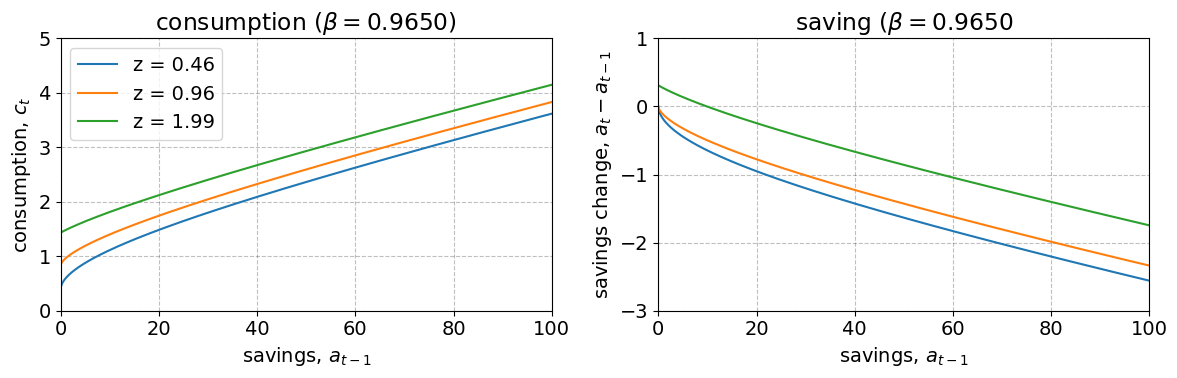

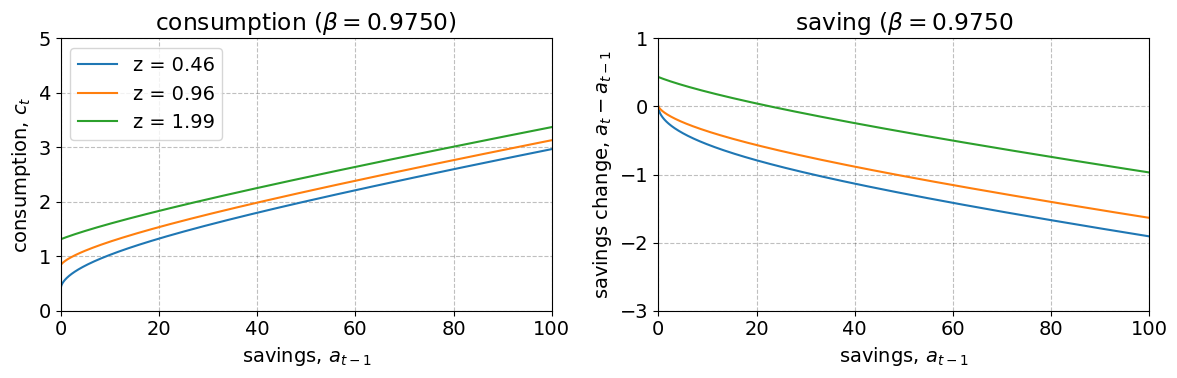

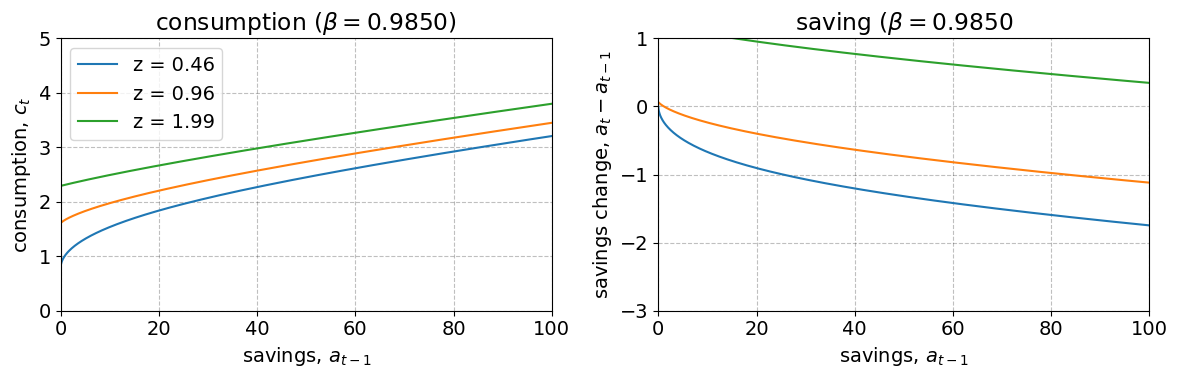

In [19]:
# Loop over beta values
for i_beta, beta in enumerate(par.beta_grid):
    


    fig = plt.figure(figsize=(12,4),dpi=100)
    I = par.a_grid < 500
    
    # a. consumption
    ax = fig.add_subplot(1,2,1)
    ax.set_title(f'consumption ($\\beta = {beta:.4f}$)')

    for i_z, z in enumerate(par.z_grid):
        if i_z % 3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I], ss.c[i_beta, i_z, I], label=f'z = {z:.2f}')
            
    ax.legend(frameon=True)
    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('consumption, $c_t$')
    ax.set_xlim(0,100)
    ax.set_ylim(0,5)

    # b. saving
    ax = fig.add_subplot(1,2,2)
    ax.set_title(f'saving ($\\beta = {beta:.4f}$')

    for i_z, z in enumerate(par.z_grid):
        if i_z % 3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I], ss.a[i_beta, i_z, I] - par.a_grid[I], label=f'z = {z:.2f}')

    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')
    ax.set_xlim(0,100)
    ax.set_ylim(-3,1)

    fig.tight_layout()
    # fig.savefig(f'figs/c_func_{i_beta}_{eta}.pdf')

production_firm: [K,L0,L1] -> [Gamma,rK,w,Y]
mutual_fund: [K,rK] -> [A,r]
hh: [phi1,r,w] -> [phi0,A_hh,C_hh,L0_hh,L1_hh]
market_clearing: [A,A_hh,L0,L1,L0_hh,L1_hh,Y,C_hh,K] -> [I,clearing_A,clearing_L0,clearing_L1,clearing_Y]


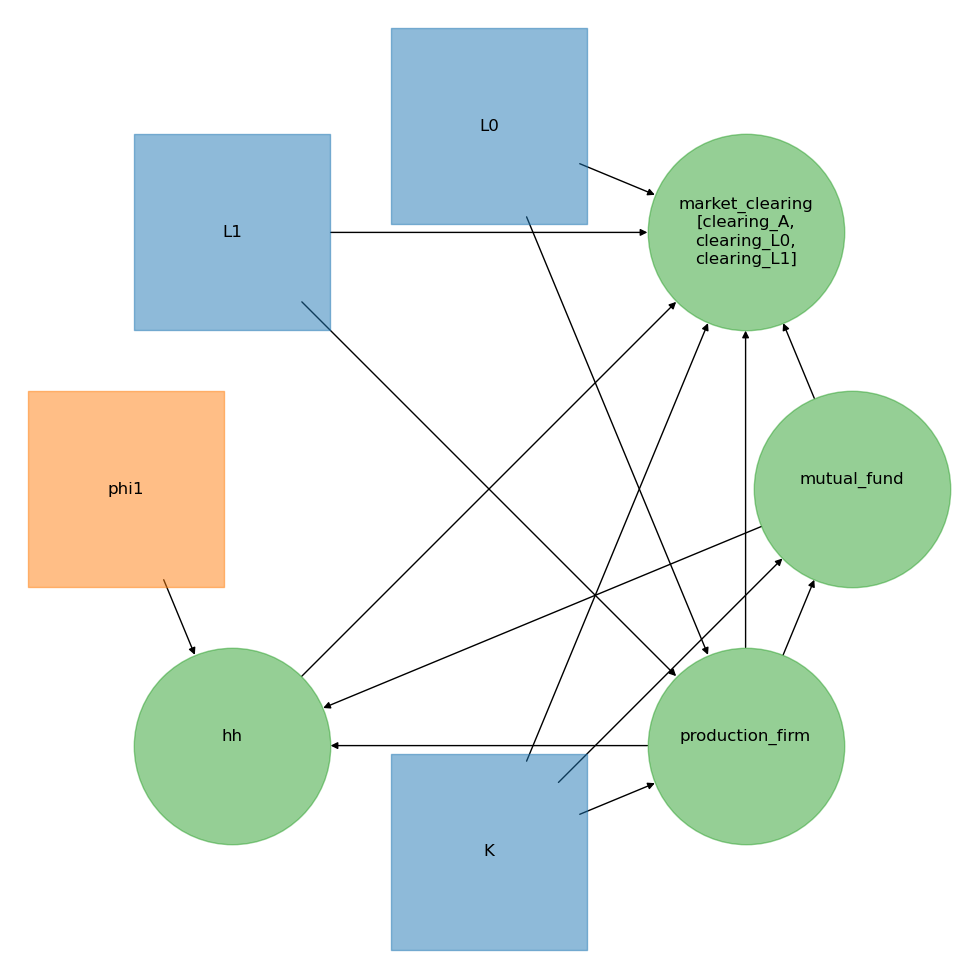

In [20]:
model.info(only_blocks=True)
model.draw_DAG(figsize=(10,10))

note: inputs = steady state value -> expected: constant value (straigt line)



household problem solved along transition path in 1.6 secs
household problem simulated along transition in 0.8 secs



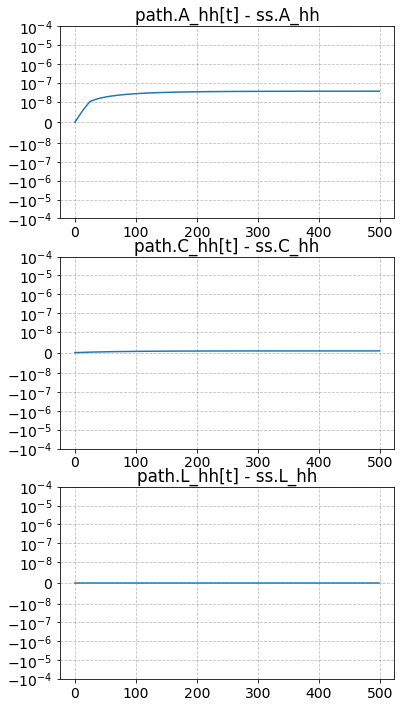

In [ ]:
model.test_hh_path()

In [ ]:
model.compute_jacs()

/home/b163467@PROD.SITAD.DK/AdvMacroHet/Assignments/Assignment_I/blocks.py:17: RuntimeWarning: divide by zero encountered in true_divide
  rK[:] = par.alpha*Gamma*(K_lag/L)**(par.alpha-1.0)
/home/b163467@PROD.SITAD.DK/AdvMacroHet/Assignments/Assignment_I/blocks.py:17: RuntimeWarning: invalid value encountered in true_divide
  rK[:] = par.alpha*Gamma*(K_lag/L)**(par.alpha-1.0)
/home/b163467@PROD.SITAD.DK/AdvMacroHet/Assignments/Assignment_I/blocks.py:18: RuntimeWarning: divide by zero encountered in true_divide
  w[:] = (1.0-par.alpha)*Gamma*(K_lag/L)**par.alpha
/home/b163467@PROD.SITAD.DK/AdvMacroHet/Assignments/Assignment_I/blocks.py:18: RuntimeWarning: invalid value encountered in true_divide
  w[:] = (1.0-par.alpha)*Gamma*(K_lag/L)**par.alpha
/home/b163467@PROD.SITAD.DK/AdvMacroHet/Assignments/Assignment_I/blocks.py:18: RuntimeWarning: invalid value encountered in multiply
  w[:] = (1.0-par.alpha)*Gamma*(K_lag/L)**par.alpha


#### 3.2.2. <a id='toc3_2_2_'></a>[Distributions](#toc0_)

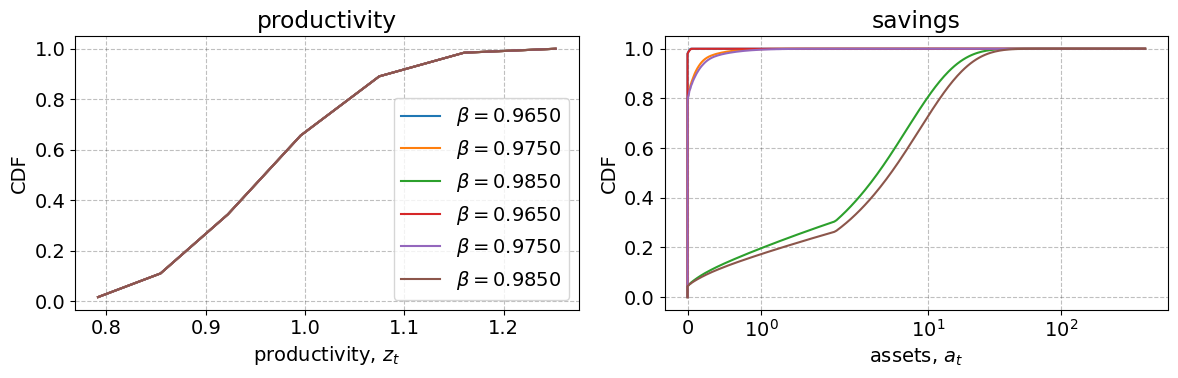

In [ ]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')
for i_beta,beta in enumerate(par.beta_grid):
    ax.plot(par.z_grid,np.cumsum(np.sum(ss.D[i_beta],axis=1))*par.Nfix,label=f'$\\beta = {beta:.4f}$')

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')
ax.legend()

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
for i_beta in range(par.Nfix):
    ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D[i_beta],axis=0)),0,0.0)*par.Nfix,label=f'$\\beta = {par.beta_grid[i_beta]:.4f}$')
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

fig.tight_layout()
fig.savefig('figs/distribution.pdf')

**Income moments:**

In [ ]:
mean_z = np.sum(ss.D*par.z_grid[:,np.newaxis])
std_z = np.sqrt(np.sum(ss.D*(par.z_grid[np.newaxis,:,np.newaxis]-mean_z)**2))
print(f'mean z: {mean_z:5.2f}')
print(f'std. z: {std_z:5.2f}')

mean z:  1.00
std. z:  0.09


**Asset moments:**

In [ ]:
# a. prepare
Da = np.sum(ss.D,axis=(0,1))
Da_cs = np.cumsum(Da)
mean_a = np.sum(Da*par.a_grid)
std_a = np.sqrt(np.sum(Da*(par.a_grid-mean_a)**2))

def percentile(par,Da_cs,p):
    
    # a. check first
    if p < Da_cs[0]: return par.a_grid[0]
    
    # b. find with loop
    i = 0
    while True:
        if p > Da_cs[i+1]:
            if i+1 >= par.Na: raise Exception()
            i += 1
            continue
        else:
            w = (p-Da_cs[i])/(Da_cs[i+1]-Da_cs[i])
            diff = par.a_grid[i+1]-par.a_grid[i]
            return par.a_grid[i]+w*diff
        
p25_a = percentile(par,Da_cs,0.25)
p50_a = percentile(par,Da_cs,0.50)
p95_a = percentile(par,Da_cs,0.95)
p99_a = percentile(par,Da_cs,0.99)

# b. print
print(f'mean a: {mean_a:6.3f}')
print(f'p25  a: {p25_a:6.3f}')
print(f'p50  a: {p50_a:6.3f}')
print(f'p95  a: {p95_a:6.3f}')
print(f'p99  a: {p99_a:6.3f}')
print(f'std. a: {std_a:6.3f}')

mean a:  2.244
p25  a:  0.000
p50  a:  0.000
p95  a: 12.871
p99  a: 23.099
std. a:  5.016


**MPC:**

In [ ]:
def calc_MPC(par,ss):
    
    MPC = np.zeros(ss.D.shape)
    dc = (ss.c[:,:,1:]-ss.c[:,:,:-1])
    dm = (1+model.ss.r)*par.a_grid[np.newaxis,np.newaxis,1:]-(1+model.ss.r)*par.a_grid[np.newaxis,np.newaxis,:-1]
    MPC[:,:,:-1] = dc/dm
    MPC[:,:,-1] = MPC[:,:,-1] # assuming constant MPC at end
    mean_MPC = np.sum(MPC*ss.D)
    return mean_MPC

mean_MPC = calc_MPC(par,ss)
print(f'mean MPC: {mean_MPC:.3f}')

mean MPC: 0.514


**Question:** What is the correlation between income and savings?

## 4. <a id='toc4_'></a>[Idiosyncratic risk and the steady state interest rate](#toc0_)

In [ ]:
print(f'ss.A_hh = ss.K = {ss.A_hh:.2f}')
print(f'ss.r = {ss.r*100:.2f} %')
print('')
      
for sigma_psi in np.linspace(par.sigma_psi,2*par.sigma_psi,5):
    
    print(f'{sigma_psi = :.2f}')

    model_ = model.copy()
    model_.par.sigma_psi = sigma_psi
        
    model_.solve_hh_ss(do_print=False)
    model_.simulate_hh_ss(do_print=False)
    
    A_hh = np.sum(model_.ss.a*model_.ss.D)
    
    print(f'PE {A_hh = :.2f}')
          
    model_.find_ss(method='direct')

    print(f'GE ss.r = {model_.ss.r*100:.2f} %')
    print(f'GE ss.A_hh = ss.K = {model_.ss.A_hh:.2f}')

    print('')

ss.A_hh = ss.K = 2.24
ss.r = 11.46 %

sigma_psi = 0.03
PE A_hh = 2.24
GE ss.r = 11.46 %
GE ss.A_hh = ss.K = 2.24

sigma_psi = 0.04
PE A_hh = 3.63
GE ss.r = 11.42 %
GE ss.A_hh = ss.K = 2.25

sigma_psi = 0.04
PE A_hh = 5.37
GE ss.r = 11.38 %
GE ss.A_hh = ss.K = 2.26

sigma_psi = 0.05
PE A_hh = 7.42
GE ss.r = 11.33 %
GE ss.A_hh = ss.K = 2.27

sigma_psi = 0.06
PE A_hh = 9.78
GE ss.r = 11.26 %
GE ss.A_hh = ss.K = 2.28



## 5. <a id='toc5_'></a>[Calibration](#toc0_)

Choose `beta_mean` to get chosen average MPC.

In [ ]:
from root_finding import brentq

In [ ]:
def calib_obj(beta_mean,model):
    """ calibration objective """
    
    model.par.beta_mean = beta_mean
    model.find_ss(method='direct')    
    
    mean_MPC = calc_MPC(model.par,model.ss)
    
    return mean_MPC-0.27

In [ ]:
model_calib = model.copy()
brentq(calib_obj,par.beta_mean-0.01,par.beta_mean,args=(model_calib,),do_print=True,varname='beta_mean',funcname='MPC-0.27',xtol=1e-8,rtol=1e-8);

  0: beta_mean =   0.97336149 -> MPC-0.27 =   0.00019389
  1: beta_mean =   0.97346390 -> MPC-0.27 =   0.00000231
  2: beta_mean =   0.97346514 -> MPC-0.27 =  -0.00000000
  3: beta_mean =   0.97346513 -> MPC-0.27 =   0.00000002

beta_mean =   0.97346514 [MPC-0.27 =  -0.00000000]



In [ ]:
print(f'ss.r = {model_calib.ss.r*100:.2f} %')
print(f'ss.K = {model_calib.ss.K:.2f}')

ss.r = 1.15 %
ss.K = 2.43


**Question:** What could an alternative be to use a root-finder?

## 6. <a id='toc6_'></a>[Extra: Demand vs. supply of capital](#toc0_)

In [ ]:
# allocate
Nr_ss = 7
r_ss_min = 0.007
r_ss_max = 0.013
r_ss_vec = np.linspace(r_ss_min,r_ss_max,Nr_ss)

K_hh_supply = np.zeros(Nr_ss)
K_firm_demand = np.zeros(Nr_ss)

# calculate
for i,r_ss in enumerate(r_ss_vec):
    
    print(f'{r_ss = :7.4f}')
          
    model_ = model.copy()
    model_.ss.r = r_ss
    
    # a. firms
    K_firm_demand[i] = ((r_ss+par.delta)/(par.alpha*ss.Gamma))**(1/(par.alpha-1))
    print(f'K_firm_demand = {K_firm_demand[i]:7.4f}')
    
    w_ss = model_.ss.w = (1.0-par.alpha)*ss.Gamma*(K_firm_demand[i]/ss.L)**par.alpha

    print(f'{w_ss = :7.4f}')

    # b. households
    model_.solve_hh_ss(do_print=True)
    model_.simulate_hh_ss(do_print=True)
    
    K_hh_supply[i] = np.sum(model_.ss.a*model_.ss.D)
    print(f'K_hh_supply = {K_hh_supply[i]:7.4f}')
          
    # c. clearing
    clearing_A = K_hh_supply[i]-K_firm_demand[i]
    print(f'{clearing_A = :7.4f}\n')
    

r_ss =  0.0070
K_firm_demand =  2.8406
w_ss =  1.0084
household problem in ss solved in 1.1 secs [970 iterations]
household problem in ss simulated in 0.1 secs [875 iterations]
K_hh_supply =  1.7028
clearing_A = -1.1377

r_ss =  0.0080
K_firm_demand =  2.8185
w_ss =  1.0056
household problem in ss solved in 1.2 secs [1059 iterations]
household problem in ss simulated in 0.1 secs [1005 iterations]
K_hh_supply =  1.9735
clearing_A = -0.8450

r_ss =  0.0090
K_firm_demand =  2.7967
w_ss =  1.0028
household problem in ss solved in 1.2 secs [1166 iterations]
household problem in ss simulated in 0.1 secs [1181 iterations]
K_hh_supply =  2.3182
clearing_A = -0.4785

r_ss =  0.0100
K_firm_demand =  2.7751
w_ss =  1.0000
household problem in ss solved in 1.3 secs [1287 iterations]
household problem in ss simulated in 0.1 secs [1438 iterations]
K_hh_supply =  2.7751
clearing_A =  0.0000

r_ss =  0.0110
K_firm_demand =  2.7539
w_ss =  0.9972
household problem in ss solved in 1.5 secs [1431 iterati

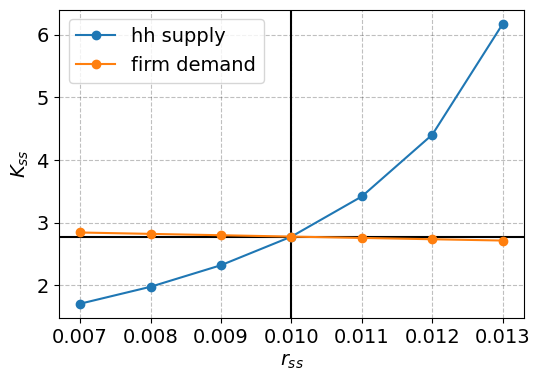

In [ ]:
fig = plt.figure(figsize=(6,6/1.5),dpi=100)
ax = fig.add_subplot(1,1,1)

ax.axvline(ss.r,color='black')
ax.axhline(ss.K,color='black')

ax.plot(r_ss_vec,K_hh_supply,'-o',label='hh supply')
ax.plot(r_ss_vec,K_firm_demand,'-o',label='firm demand')

ax.set_xlabel('$r_{ss}$')
ax.set_ylabel('$K_{ss}$')
ax.legend(frameon=True);